pscratch/sd/a/arosado/mocks_tests/3dbox/3dbox_nmesh512_L5274.0_bias1.0_seed42

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit import style, setup_logging

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [3]:
setup_logging() # turn on logging to screen

In [4]:
from nbodykit.lab import FFTPower
import nbodykit as nb
#import nbodykit.io.bigfile as bf
from nbodykit.source.catalog import BigFileCatalog
import numpy

[ 000001.36 ]   0: 03-28 15:11  numexpr.utils   INFO     Note: detected 256 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[ 000001.36 ]   0: 03-28 15:11  numexpr.utils   INFO     Note: NumExpr detected 256 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [5]:
def read_BigFile(filename):
    FILE = bf.BigFile(filename, header='Header')
    n    = FILE.size
    pos  = FILE.read('Position', 0, n)
    return nb.ArrayCatalog(pos)
#cat = read_BigFile(fn)

In [6]:
fn = "/pscratch/sd/a/arosado/mocks_tests/3dbox/3dbox_nmesh512_L5274.0_bias1.0_seed42"
cat = BigFileCatalog(fn, header='Header')

BIAS = 1.
BOX   = 5274
NMESH = 512

mesh = cat.to_mesh(compensated=True, window='cic', position='Position', BoxSize=BOX, Nmesh=NMESH)
rpol = FFTPower(mesh, mode='1d', kmin=0.0, poles=[0,2,4])
p = rpol.power

[ 000001.56 ]   0: 03-28 15:11  CatalogSource   INFO     Extra arguments to FileType: () {'header': 'Header'}
/tmp/ipykernel_224344/860721469.py:8: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(compensated=True, window='cic', position='Position', BoxSize=BOX, Nmesh=NMESH)
[ 000001.77 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 28553773 
[ 000003.49 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 4194304 out of 28553773 objects to mesh
[ 000003.49 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 4194304 ~ 8388608 / 28553773 
[ 000005.18 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 8388608 out of 28553773 objects to mesh
[ 000005.18 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 8388608 ~ 12582912 / 28553773 
[ 000006.69 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 12582912 out of 28553773 objects to mesh
[ 000006.69 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 12582912 ~ 16777216

In [29]:
p['power'].real


array([    0.        ,  5724.73677885, 12014.97222222, 11259.46710526,
       11384.5758547 , 12574.43509615, 13620.58300781, 14060.24057971,
       14883.46179775, 14466.40924956, 15504.60262009, 15710.67945545,
       14713.33398821, 14951.95046968, 15561.9363564 , 16471.24721311,
       15978.53711527, 15746.8665652 , 15178.11105882, 14848.06174385,
       14392.87514146, 14362.70756361, 14518.63843236, 13950.47619048,
       13887.46182999, 12936.38863691, 13329.23090868, 12828.54670273,
       12521.57528958, 12546.41563565, 12495.18969472, 12160.61769773,
       11766.37875782, 11448.43316033, 11325.48595996, 11052.81047727,
       10745.36194701, 10814.64588784, 10456.43238606, 10461.30887598,
       10288.07295548, 10216.97781038, 10164.87948287, 10237.43401247,
        9997.83616593,  9851.63574939,  9936.11155854,  9732.76899312,
        9698.95484746,  9573.21156458,  9528.19154151,  9439.45950423,
        9493.75181633,  9407.61454265,  9253.13012536,  9206.49487166,
      

Text(0, 0.5, '$P(k, \\mu)$ [$h^{-3} \\mathrm{Mpc}^3$]')

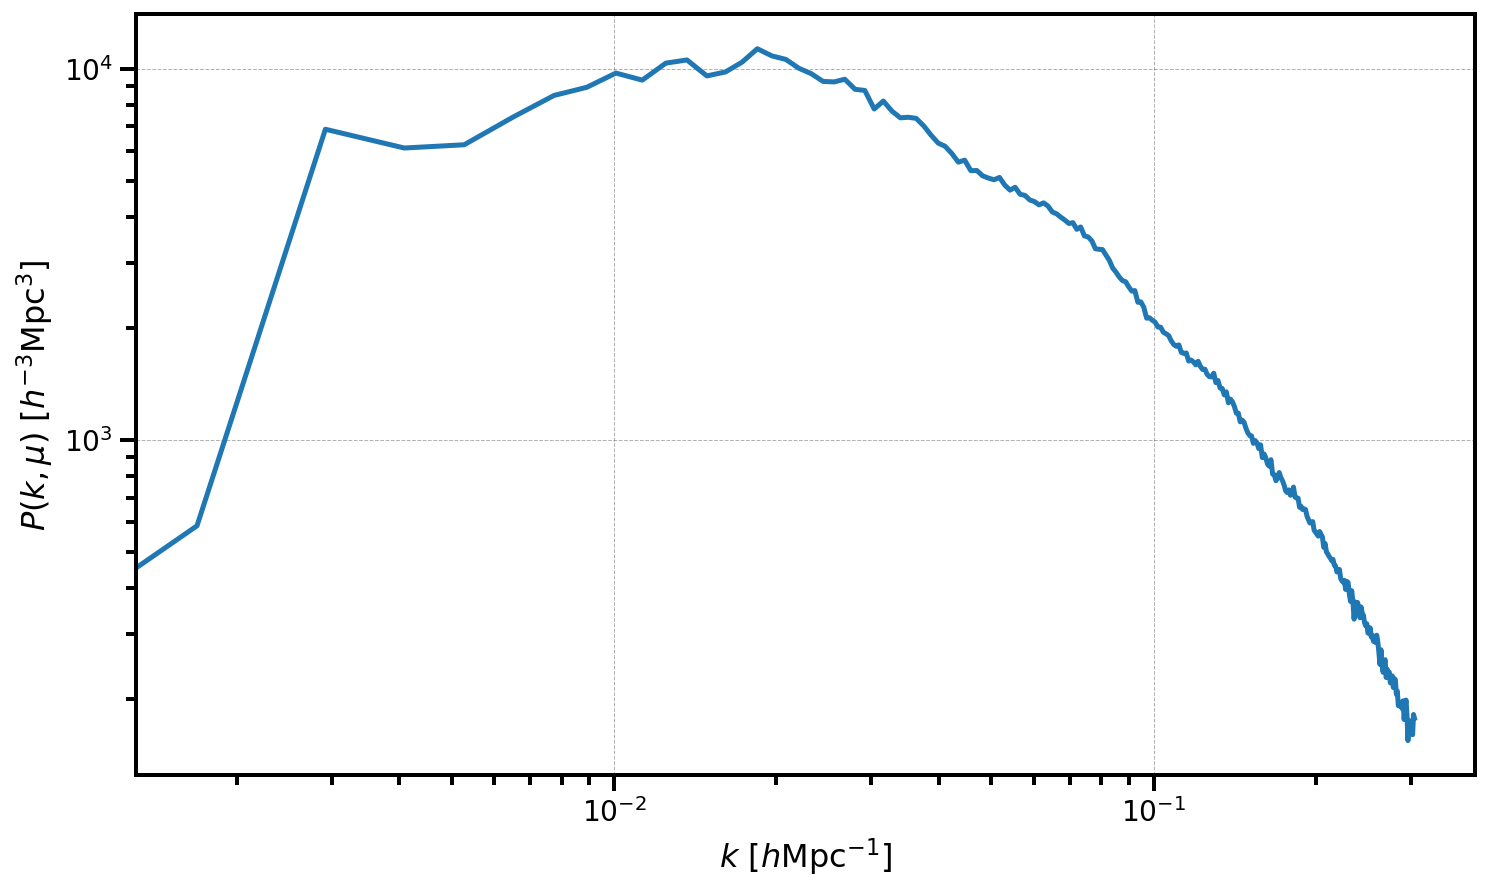

In [19]:
# plot each mu bin
Pk = p
#label = r'$\mu$=%.1f' %pkmu.coords['mu'][0]
plt.loglog(Pk['k'], (Pk['power'].real - Pk.attrs['shotnoise']))#, label=label)

# plot the biased linear power spectrum
#k = numpy.logspace(-2, 0, NMESH)
#plt.loglog(k, b1**2 * Plin(k), c='k', label=r'$b_1^2 P_\mathrm{lin}$')

# add a legend and axes labels
#plt.legend(loc=0, ncol=2, fontsize=16)
plt.xlabel(r"$k$ [$h \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3} \mathrm{Mpc}^3$]")
#plt.xlim(0.01, 0.4)
#plt.ylim(100, 2e4)

In [8]:
b1 = BIAS
redshift = 0.85 

cosmo = nb.cosmology.Planck15
Plin = nb.cosmology.LinearPower(cosmo, redshift, transfer='CLASS')

In [9]:
# compute the 2d P(k,mu) power, with 5 mu bins
r = FFTPower(mesh, mode='2d', Nmu=5)
pkmu = r.power

[ 000028.79 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 28553773 
[ 000030.63 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 4194304 out of 28553773 objects to mesh
[ 000030.64 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 4194304 ~ 8388608 / 28553773 
[ 000032.17 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 8388608 out of 28553773 objects to mesh
[ 000032.17 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 8388608 ~ 12582912 / 28553773 
[ 000033.90 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 12582912 out of 28553773 objects to mesh
[ 000033.90 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 12582912 ~ 16777216 / 28553773 
[ 000035.74 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 16777216 out of 28553773 objects to mesh
[ 000035.74 ]   0: 03-28 15:11  CatalogMesh     INFO     Chunk 16777216 ~ 20971520 / 28553773 
[ 000037.51 ]   0: 03-28 15:11  CatalogMesh     INFO     painted 20971520 out of 28553773 objects to mesh
[ 000037

(100, 20000.0)

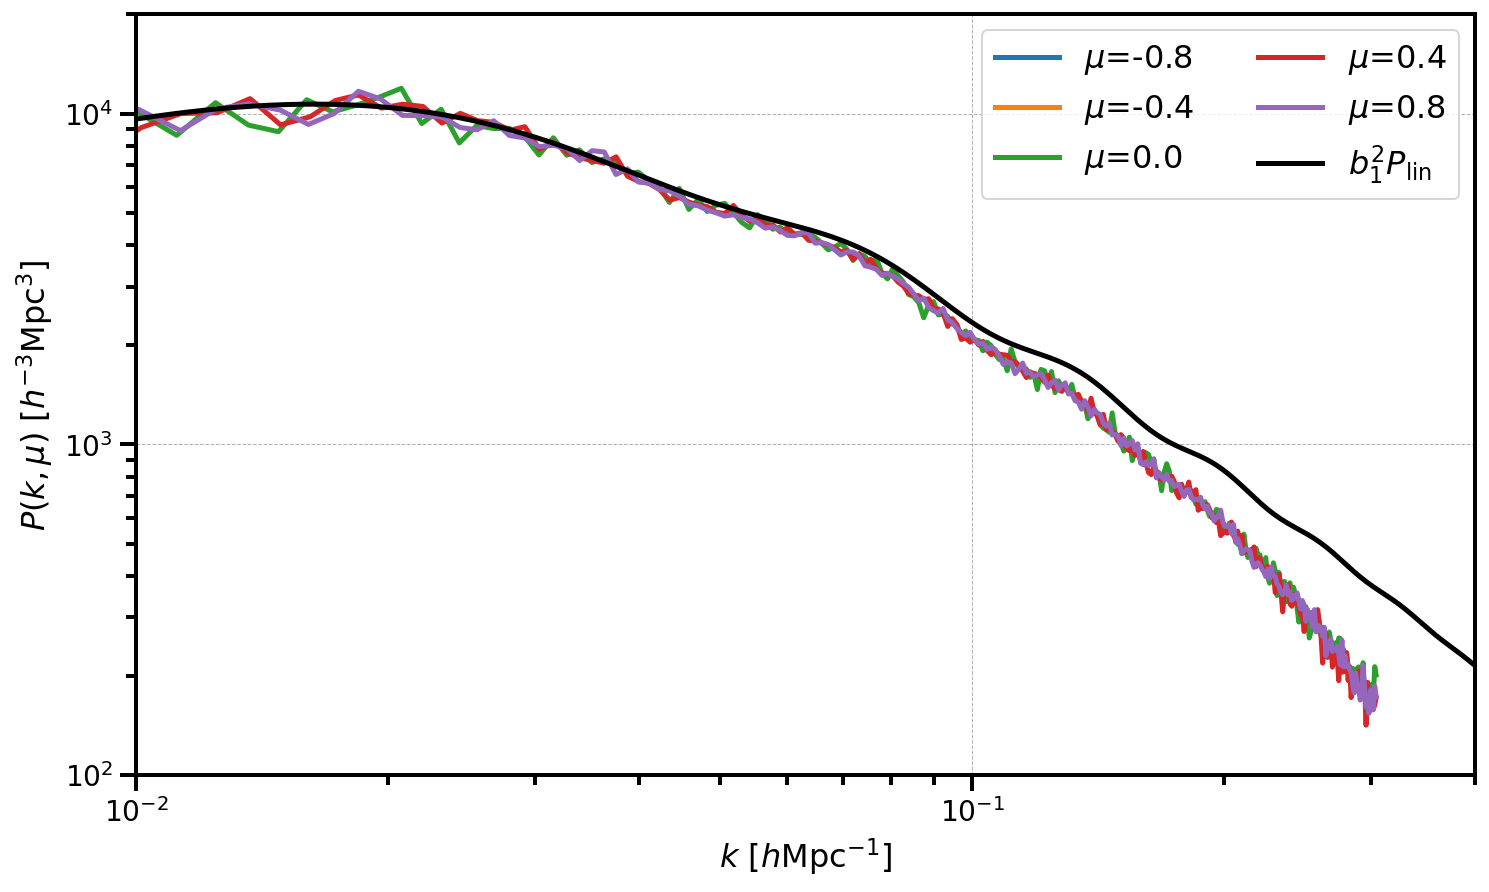

In [10]:
# plot each mu bin
for i in range(pkmu.shape[1]):
    Pk = pkmu[:,i]
    label = r'$\mu$=%.1f' %pkmu.coords['mu'][i]
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'], label=label)

# plot the biased linear power spectrum
k = numpy.logspace(-2, 0, 512)
plt.loglog(k, b1**2 * Plin(k), c='k', label=r'$b_1^2 P_\mathrm{lin}$')

# add a legend and axes labels
plt.legend(loc=0, ncol=2, fontsize=16)
plt.xlabel(r"$k$ [$h \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.4)
plt.ylim(100, 2e4)

In [11]:
n = cat.size
pos = cat.read(['Position'])
pos[0]

dask.array<array, shape=(28553773, 3), dtype=float32, chunksize=(100000, 3), chunktype=numpy.ndarray>